# Gaussian Microwave Beam

The beam width varies as a function of position, given by  

$$w(z)=w_0\sqrt{1+\left(z/z_r\right)^2},$$

where $w_0$ is the width at the focal point, $z$ the distance from the focal point and $z_r=\frac{\pi w_0}{\lambda},$
the Rayleigh range.

The radius of the beam along the beampath is related tot he FWHM at that position

$$w(z)=\frac{FWHM}{\sqrt{2\ln2}}$$

From Jakobs notes in `2 rotational cooling`, the window should be at least 1.8 times larger than the microwave beam to avoid loosing too much microwave power.

In [1]:
import numpy as np

def microwave_waist(z, w0, wavelength):
    zr =(np.pi*w0**2)/wavelength
    return w0*np.sqrt(1+(z/zr)**2)

In [2]:
import scipy.constants as cst

frequency = 13.4e9 # GHz
wavelength = cst.c/frequency # m

print('wavelength : {0:.2f} cm'.format(wavelength*100))

wavelength : 2.24 cm


setting the beam waist $w_0$ at the center to be equivalent to the cross section of the beams
$$\sim \sqrt{20^2+10^2} = \sqrt{500} = 22.36~\mathrm{mm}$$

In [3]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

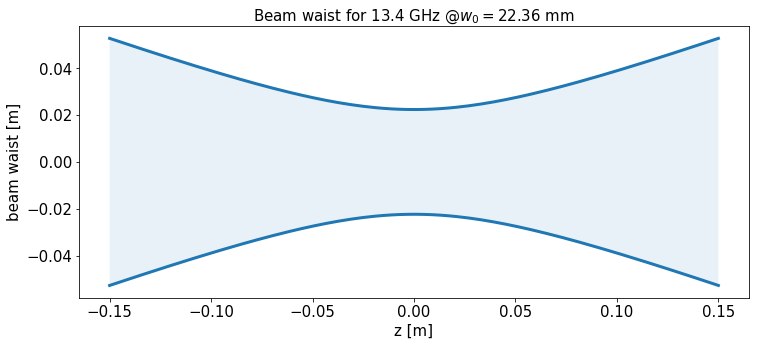

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-150e-3, 150e-3, 150) # m
w0 = 22.36e-3 # m
waist_curve = microwave_waist(z, w0, wavelength)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(z, waist_curve, lw = 3)
ax.plot(z, -waist_curve, 'C0', lw = 3)
ax.fill_between(z, waist_curve, -waist_curve, facecolor = 'C0', alpha = 0.1)
ax.set_xlabel('z [m]')
ax.set_ylabel('beam waist [m]')
ax.set_title('Beam waist for 13.4 GHz @$w_0=22.36$ mm')
set_fontsize(ax, 15)

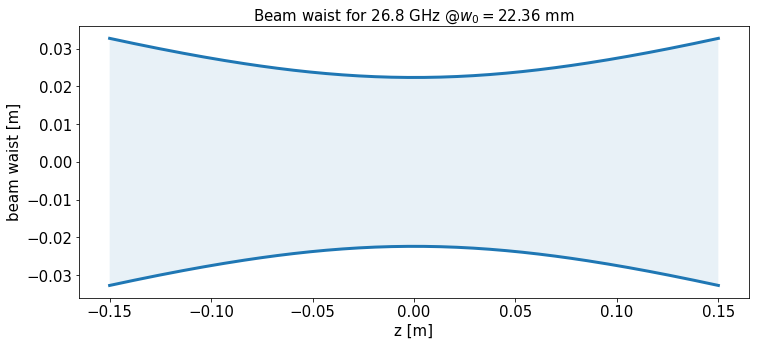

In [5]:
wavelength_half = wavelength/2
waist_curve_half = microwave_waist(z, w0, wavelength_half)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(z, waist_curve_half, lw = 3)
ax.plot(z, -waist_curve_half, 'C0', lw = 3)
ax.fill_between(z, waist_curve_half, -waist_curve_half, facecolor = 'C0', alpha = 0.1)
ax.set_xlabel('z [m]')
ax.set_ylabel('beam waist [m]')
ax.set_title('Beam waist for 26.8 GHz @$w_0=22.36$ mm')
set_fontsize(ax, 15)

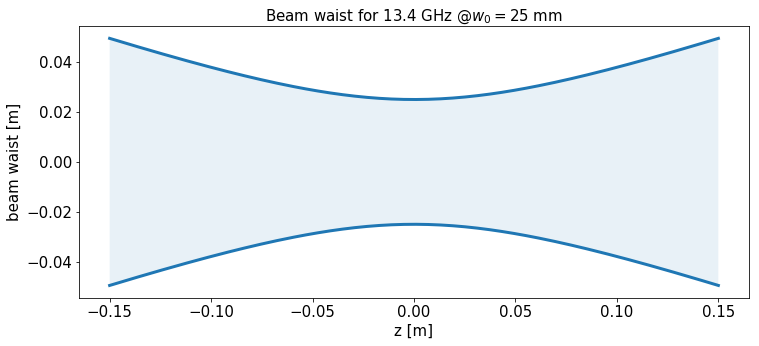

In [6]:
waist_curve = microwave_waist(z, 25e-3, wavelength)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(z, waist_curve, lw = 3)
ax.plot(z, -waist_curve, 'C0', lw = 3)
ax.fill_between(z, waist_curve, -waist_curve, facecolor = 'C0', alpha = 0.1)
ax.set_xlabel('z [m]')
ax.set_ylabel('beam waist [m]')
ax.set_title('Beam waist for 13.4 GHz @$w_0=25$ mm')
set_fontsize(ax, 15)

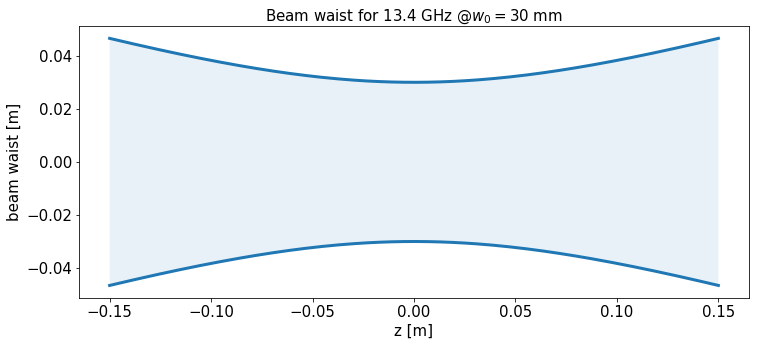

In [7]:
waist_curve = microwave_waist(z, 30e-3, wavelength)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(z, waist_curve, lw = 3)
ax.plot(z, -waist_curve, 'C0', lw = 3)
ax.fill_between(z, waist_curve, -waist_curve, facecolor = 'C0', alpha = 0.1)
ax.set_xlabel('z [m]')
ax.set_ylabel('beam waist [m]')
ax.set_title('Beam waist for 13.4 GHz @$w_0=30$ mm')
set_fontsize(ax, 15)

### Window radius

The windows have to be larger than the beam waist to prevent clipping of the microwave beam, by a factor 1.8 (See notes of Jakob)

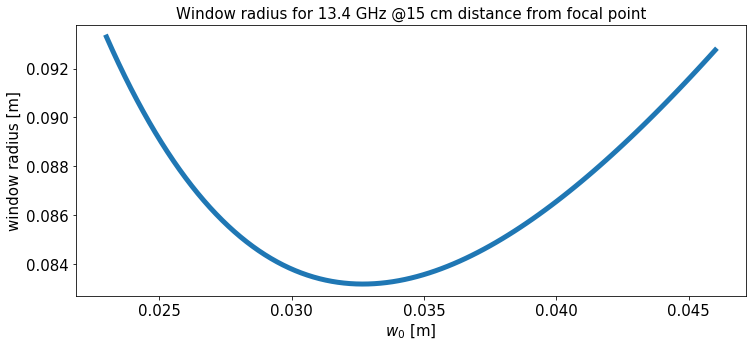

In [8]:
window_factor = 1.8
w0 = np.linspace(23e-3, 46e-3, 101)

waist_curve = window_factor*microwave_waist(0.15, w0, wavelength)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(w0, waist_curve, lw = 5)
ax.set_xlabel('$w_0$ [m]')
ax.set_ylabel('window radius [m]')
ax.set_title('Window radius for 13.4 GHz @15 cm distance from focal point')
set_fontsize(ax, 15)

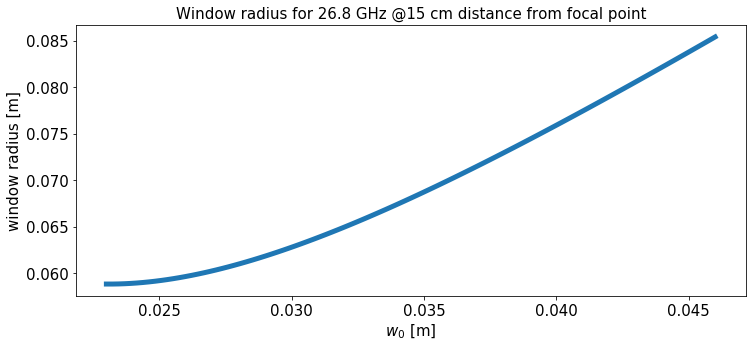

In [9]:
w0 = np.linspace(23e-3, 46e-3, 101)

waist_curve = window_factor*microwave_waist(0.15, w0, wavelength_half)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(w0, waist_curve, lw = 5)
ax.set_xlabel('$w_0$ [m]')
ax.set_ylabel('window radius [m]')
ax.set_title('Window radius for 26.8 GHz @15 cm distance from focal point')
set_fontsize(ax, 15)